### Import Dataset

In [1]:
import pandas as pd

g_csv_name = "New_Nozzle_set1"
b_csv_name = "Bad_Nozzle_set3"

g_df = pd.read_csv(f"../data/{g_csv_name}.csv")
b_df = pd.read_csv(f"../data/{b_csv_name}.csv")


In [2]:
monitoring_time = {
    "New_Nozzle_set1": ("4:49:00 pm", "4:53:59 pm"),
    "New_Nozzle_set2": ("4:59:00 pm", "5:03:59 pm"),
    "New_Nozzle_set3": ("5:10:00 pm", "5:14:59 pm"),
}

# Retrieve the start and end times
g_start_time, g_end_time = monitoring_time.get(g_csv_name, (None, None))

if g_start_time and g_end_time:
    print(f"Start time: {g_start_time}, End time: {g_end_time}")
else:
    print(f"No match found for {b_csv_name}")

g_nozzle_df = g_df[
    (g_df["Time"] >= g_start_time) &
    (g_df["Time"] <= g_end_time)
].reset_index(drop=True)

print(f"Number of data points for process monitoring: {len(g_nozzle_df)}")

g_nozzle_df.head()

Start time: 4:49:00 pm, End time: 4:53:59 pm
Number of data points for process monitoring: 300


,Date,Time,ms,Data_Type,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure
0,5/12/2024,4:49:00 pm,0,Double[12],0,0,0,1000,4.995,1797,301.9,0,62.26,62.61,5.187,0.002
1,5/12/2024,4:49:01 pm,0,Double[12],0,0,0,1000,4.995,1797,299.4,0,62.26,62.61,5.187,0.002
2,5/12/2024,4:49:02 pm,0,Double[12],0,0,0,1000,4.995,1797,300.4,0,62.26,62.61,5.187,0.002
3,5/12/2024,4:49:03 pm,0,Double[12],0,0,0,1000,4.995,1797,298.3,0,62.26,62.61,5.187,0.002
4,5/12/2024,4:49:04 pm,0,Double[12],0,0,0,1000,4.993,1797,298.6,0,62.26,62.61,5.187,0.002


In [3]:
# Dictionary to map b_csv_name to start and end times
monitoring_time = {
    "Bad_Nozzle_set1": ("4:28:00 pm", "4:32:59 pm"),
    "Bad_Nozzle_set2": ("11:37:00 am", "11:41:59 am"),
    "Bad_Nozzle_set3": ("11:45:00 am", "11:49:59 am"),
    "Worst_Nozzle_set1": ("6:10:00 pm", "6:14:59 pm"),
    "Worst_Nozzle_set2": ("10:59:00 am", "11:03:59 am"),
    "Worst_Nozzle_set3": ("11:13:00 am", "11:17:59 am"),
    "Good_Nozzle_set1": ("4:47:00 pm", "4:51:59 pm"),
}

# Retrieve the start and end times
b_start_time, b_end_time = monitoring_time.get(b_csv_name, (None, None))

if b_start_time and b_end_time:
    print(f"Start time: {b_start_time}, End time: {b_end_time}")
else:
    print(f"No match found for {b_csv_name}")

b_nozzle_df = b_df[
    (b_df["Time"] >= b_start_time) &
    (b_df["Time"] <= b_end_time)
].reset_index(drop=True)

print(f"Number of data points for process monitoring: {len(b_nozzle_df)}")

b_nozzle_df.head()


Start time: 11:37:00 am, End time: 11:41:59 am
Number of data points for process monitoring: 300


,Date,Time,ms,Data_Type,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure
0,5/12/2024,11:37:00 am,0,Double[12],0,0,0,1000,4.999,1754,299.9,0,62.26,62.62,5.185,0.002
1,5/12/2024,11:37:01 am,0,Double[12],0,0,0,1000,4.999,1751,299.9,0,62.26,62.62,5.185,0.002
2,5/12/2024,11:37:02 am,0,Double[12],0,0,0,1000,4.999,1753,299.8,0,62.26,62.62,5.185,0.002
3,5/12/2024,11:37:03 am,0,Double[12],0,0,0,1000,5.002,1749,300.6,0,62.26,62.62,5.185,0.002
4,5/12/2024,11:37:04 am,0,Double[12],0,0,0,1000,5.002,1754,299.4,0,62.26,62.62,5.185,0.002


### Exploratory Data Analysis (EDA)

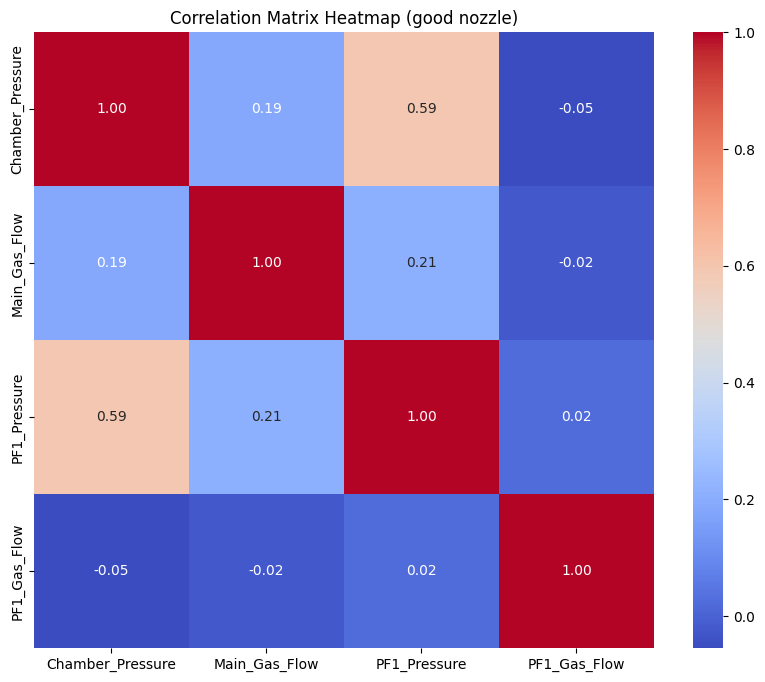

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

pros_param = ["Chamber_Pressure", "Main_Gas_Flow", "PF1_Pressure", "PF1_Gas_Flow"]

# Filter the DataFrame for good nozzle process parameters
g_pros_param_df = g_nozzle_df[pros_param]

# Compute the covariance matrix
g_corr_matrix = g_pros_param_df.corr(method='spearman')  # or 'kendall'

# Visualization (Optional)
plt.figure(figsize=(10, 8))
sns.heatmap(g_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap (good nozzle)")
# plt.savefig(f"../graphs/{g_csv_name}_cor_matrix.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


Mean of Main Gas Flow (Good Nozzle)              : 1789.0066666666667
Standard Deviation of Main Gas Flow (Good Nozzle): 4.720870917767423
Mean of Main Gas Flow (Bad Nozzle)               : 1759.21
Standard Deviation of Main Gas Flow (Bad Nozzle) : 8.630907638636083


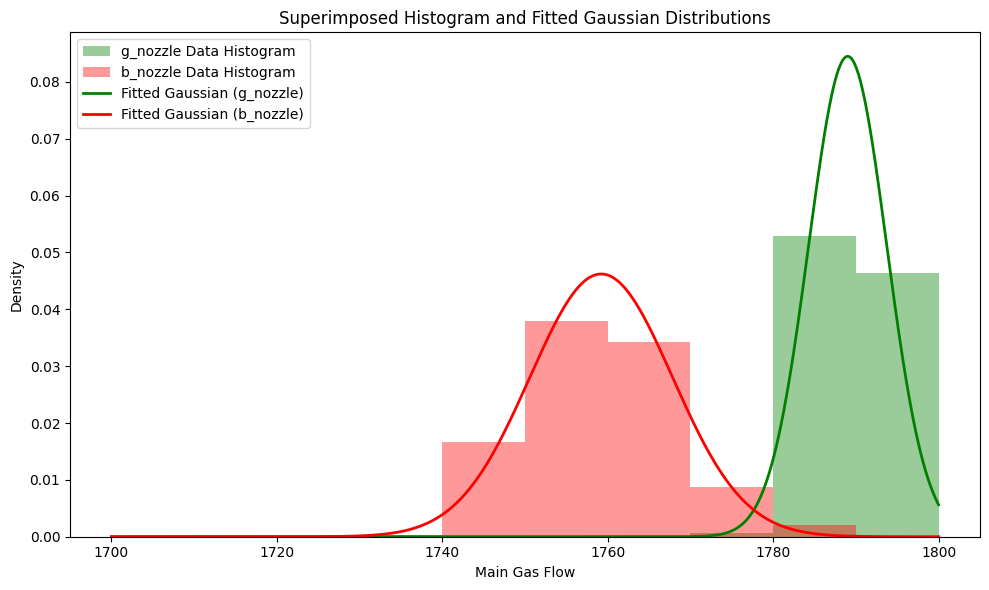

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Find the global min and max to ensure both histograms have the same range
min_range = 1700
max_range = 1800

b_pros_param_df = b_nozzle_df[pros_param]

# Assuming g_nozzle_df["Main_Gas_Flow"] and b_nozzle_df["Main_Gas_Flow"] are available
g_main_gas_flow = g_pros_param_df["Main_Gas_Flow"].to_numpy()
b_main_gas_flow = b_pros_param_df["Main_Gas_Flow"].to_numpy()

# Calculate mean and std for both datasets
mean_g = np.mean(g_main_gas_flow)
std_g = np.std(g_main_gas_flow)

mean_b = np.mean(b_main_gas_flow)
std_b = np.std(b_main_gas_flow)

# Fit Gaussian distributions
x = np.linspace(min_range, max_range, 1000)
pdf_fitted_g = norm.pdf(x, mean_g, std_g)
pdf_fitted_b = norm.pdf(x, mean_b, std_b)

# Print mean and std for both
print(f"Mean of Main Gas Flow (Good Nozzle)              : {mean_g}")
print(f"Standard Deviation of Main Gas Flow (Good Nozzle): {std_g}")
print(f"Mean of Main Gas Flow (Bad Nozzle)               : {mean_b}")
print(f"Standard Deviation of Main Gas Flow (Bad Nozzle) : {std_b}")

bins = 10

# Plotting histograms and Gaussian fits superimposed
plt.figure(figsize=(10, 6))

# Histogram for g_nozzle with Gaussian fit
plt.hist(g_main_gas_flow, bins=bins, density=True, alpha=0.4, color='g', label='g_nozzle Data Histogram', range=(min_range, max_range))

# Histogram for b_nozzle with Gaussian fit
plt.hist(b_main_gas_flow, bins=bins, density=True, alpha=0.4, color='r', label='b_nozzle Data Histogram', range=(min_range, max_range))

# Plot fitted Gaussian distributions
plt.plot(x, pdf_fitted_g, 'g', linewidth=2, label='Fitted Gaussian (g_nozzle)')
plt.plot(x, pdf_fitted_b, 'r', linewidth=2, label='Fitted Gaussian (b_nozzle)')

# Adding labels and legend
plt.title('Superimposed Histogram and Fitted Gaussian Distributions')
plt.xlabel('Main Gas Flow')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
# plt.savefig(f"../graphs/{g_csv_name}-vs-{b_csv_name}_hist.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


### Supervised Learning (Observing a Window)

1. **Mahalanobis Distance**: Measures the distance of a point from a distribution, considering correlations between variables. Useful for detecting multivariate outliers.

2. **Elliptic Envelope**: Fits a Gaussian distribution to the data and identifies outliers lying outside an elliptical boundary.

3. **Isolation Forest**: Detects anomalies by isolating data points using random decision trees. Anomalies require fewer splits to isolate.

4. **One-class SVM**: Classifies data by learning the boundary of a single class and identifies outliers as points outside this boundary.


In [6]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from distancia import Mahalanobis
from scipy.stats import chi2

good_data = g_pros_param_df.to_numpy()
unseen_data = b_pros_param_df.to_numpy()

print(good_data.shape)
print(unseen_data.shape)

# Rolling average for process monitoring
window_size = 60
rolling_data = pd.DataFrame(unseen_data).rolling(window=window_size).mean().dropna()

# 1. Train models
# Mahalanobis Distance
# cov_matrix = np.cov(good_data, rowvar=False)
# inv_cov_matrix = np.linalg.inv(cov_matrix)
# mean_vector = np.mean(good_data, axis=0)

# Elliptic Envelope
elliptic_model = EllipticEnvelope().fit(good_data)

# Isolation Forest
isolation_forest = IsolationForest(contamination=0.1, random_state=42).fit(good_data)

# One-Class SVM
one_class_svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05).fit(good_data)

# 2. Process Monitoring Simulation
results = []
for idx, row in rolling_data.iterrows():
    data_point = row.values
    
    # Mahalanobis Distance
    mahalanobis_score = Mahalanobis().calculate(data_point, good_data)
    
    # Elliptic Envelope
    elliptic_score = elliptic_model.predict([data_point])[0]
    
    # Isolation Forest
    isolation_score = isolation_forest.predict([data_point])[0]
    
    # One-Class SVM
    svm_score = one_class_svm.predict([data_point])[0]
    
    results.append({
        "index": idx,
        "mahalanobis_score": mahalanobis_score,
        "elliptic_score": elliptic_score,
        "isolation_score": isolation_score,
        "svm_score": svm_score
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Number of features (degrees of freedom)
dof = g_pros_param_df.shape[1]

# Confidence level (e.g., 95%)
alpha = 0.05
threshold = chi2.ppf(1 - alpha, dof)

print(f"Degrees of Freedom: {dof}")
print(f"Threshold for Mahalanobis distance: {threshold}")

results_df['mahalanobis_anomaly'] = results_df['mahalanobis_score'] > threshold
results_df['elliptic_anomaly'] = results_df['elliptic_score'] < 0
results_df['isolation_anomaly'] = results_df['isolation_score'] < 0
results_df['svm_anomaly'] = results_df['svm_score'] < 0

results_df

(300, 4)
(300, 4)


c:\Users\yongz\Desktop\CRP11_A02\.venv\lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-25.022632879715282 > -57.850929434333757). You may want to try with a higher value of support_fraction (current value: 0.510).
  warnings.warn(
c:\Users\yongz\Desktop\CRP11_A02\.venv\lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-25.019234607966748 > -57.743587688993770). You may want to try with a higher value of support_fraction (current value: 0.510).
  warnings.warn(


Degrees of Freedom: 4
Threshold for Mahalanobis distance: 9.487729036781154


,index,mahalanobis_score,elliptic_score,isolation_score,svm_score,mahalanobis_anomaly,elliptic_anomaly,isolation_anomaly,svm_anomaly
0,59,9.142194,-1,-1,-1,False,True,True,True
1,60,9.129896,-1,-1,-1,False,True,True,True
2,61,9.108231,-1,-1,-1,False,True,True,True
3,62,9.093331,-1,-1,-1,False,True,True,True
4,63,9.042853,-1,-1,-1,False,True,True,True
...,...,...,...,...,...,...,...,...,...
236,295,7.064356,-1,-1,-1,False,True,True,True
237,296,7.016178,-1,-1,-1,False,True,True,True
238,297,6.980427,-1,-1,-1,False,True,True,True
239,298,6.918359,-1,-1,-1,False,True,True,True


In [7]:
counts = results_df['mahalanobis_anomaly'].value_counts()
print(counts)

mahalanobis_anomaly
False    241
Name: count, dtype: int64


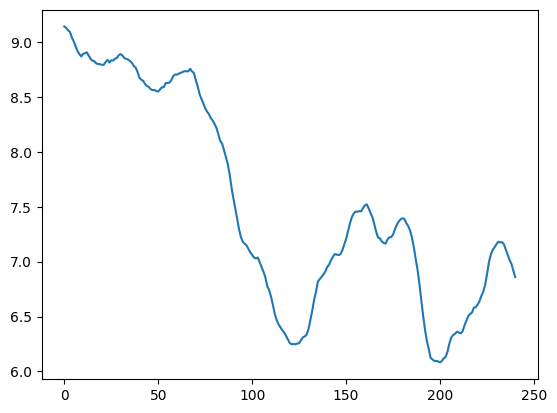

In [8]:
plt.figure()
plt.plot(results_df['mahalanobis_score'])
plt.show()

In [9]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import norm
# import imageio.v2 as imageio
# import os

# # Rolling window size
# rolling_window_size = 60

# # Generate frames for the GIF
# frames = []
# output_folder = "frames"

# # Create output folder if it doesn't exist
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# # Convert data to NumPy arrays
# g_main_gas_flow = g_pros_param_df["Main_Gas_Flow"].to_numpy()
# b_main_gas_flow = b_pros_param_df["Main_Gas_Flow"].to_numpy()

# # Set histogram range
# min_range = 1700
# max_range = 1850
# bins = 15

# # Iterate through rolling windows
# for i in range(len(b_main_gas_flow) - rolling_window_size + 1):
#     # Subset the rolling window for b_main_gas_flow
#     rolling_b_window = b_main_gas_flow[i:i + rolling_window_size]
    
#     # Calculate mean and std for the rolling window and full dataset
#     mean_g = np.mean(g_main_gas_flow)
#     std_g = np.std(g_main_gas_flow)

#     mean_b = np.mean(rolling_b_window)
#     std_b = np.std(rolling_b_window)

#     # Fit Gaussian distributions
#     x = np.linspace(min_range, max_range, 1000)
#     pdf_fitted_g = norm.pdf(x, mean_g, std_g)
#     pdf_fitted_b = norm.pdf(x, mean_b, std_b)

#     # Create the plot
#     fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#     # Left Plot: Rolling Window Visualization
#     axes[0].scatter(range(len(b_main_gas_flow)), b_main_gas_flow, label="Data Not Being Observed", alpha=0.5, color='gray')

#     window_anomaly = results_df['mahalanobis_anomaly'][i:i + rolling_window_size]
#     window_points = range(i, i + rolling_window_size)

#     if window_anomaly.any():
#         axes[0].scatter(window_points, b_main_gas_flow[i:i + rolling_window_size], color='red', label="Data Being Observed")
#     else:
#         axes[0].scatter(window_points, b_main_gas_flow[i:i + rolling_window_size], color='green', label="Data Being Observed")

#     axes[0].axvline(i + rolling_window_size - 1, color='gray', linestyle='--', alpha=0.5)
#     axes[0].axvline(i - 1, color='gray', linestyle='--', alpha=0.5)

#     axes[0].set_title(f"Rolling Window Visualization (Frame {i+1})")
#     axes[0].set_xlabel("Timestamp")
#     axes[0].set_ylabel("Main Gas Flow")
#     axes[0].legend()

#     # Right Plot: Gaussian Fit
#     axes[1].hist(g_main_gas_flow, bins=bins, density=True, alpha=0.4, color='g', 
#                  label='g_nozzle Data Histogram', range=(min_range, max_range))

#     axes[1].hist(rolling_b_window, bins=bins, density=True, alpha=0.4, color='r', 
#                  label='b_nozzle Data Histogram (Rolling Window)', range=(min_range, max_range))

#     axes[1].plot(x, pdf_fitted_g, 'g', linewidth=2, label='Fitted Gaussian (g_nozzle)')
#     axes[1].plot(x, pdf_fitted_b, 'r', linewidth=2, label='Fitted Gaussian (b_nozzle)')

#     axes[1].set_title(f"Gaussian Fit (Frame {i+1})")
#     axes[1].set_xlabel("Main Gas Flow")
#     axes[1].set_ylabel("Density")
#     axes[1].legend()

#     # Save frame
#     frame_path = f"{output_folder}/frame_{i:03d}.png"
#     plt.tight_layout()
#     plt.savefig(frame_path)
#     plt.close()
#     frames.append(frame_path)

# # Combine frames into a GIF
# gif_path = f"../graphs/{b_csv_name}_process_monitoring.gif"
# with imageio.get_writer(gif_path, mode='I', duration=0.1) as writer:
#     for frame_path in frames:
#         writer.append_data(imageio.imread(frame_path))

# # Clean up temporary files
# for frame_path in frames:
#     os.remove(frame_path)

# print(f"GIF saved as {gif_path}")


In [10]:
# import imageio

# rolling_window_size = 60  # Rolling window size
# # rolling_data = pd.Series(b_main_gas_flow).rolling(window=rolling_window_size).mean()

# # Generate frames for the GIF
# frames = []
# output_folder = "frames"

# # Create output folder if it doesn't exist
# import os
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# for i in range(len(b_main_gas_flow) - rolling_window_size + 1):
#     plt.figure(figsize=(10, 6))

#     # Plot all data points
#     plt.scatter(range(len(b_main_gas_flow)), b_main_gas_flow, label="Data Not Being Observed", alpha=0.5, color='gray')

#     # Mark all points within the current rolling window as either anomaly or non-anomaly
#     window_anomaly = results_df['elliptic_anomaly'][i:i + rolling_window_size]
#     window_points = range(i, i + rolling_window_size)

#     if window_anomaly.any():
#         # If any anomalies in the window, mark all points in the window as red
#         plt.scatter(window_points, b_main_gas_flow[i:i + rolling_window_size], color='red', label="Data Being Observed")
#     else:
#         # If no anomalies in the window, mark all points in the window as green
#         plt.scatter(window_points, b_main_gas_flow[i:i + rolling_window_size], color='green', label="Data Being Observed")

#     # Highlight the current rolling window
#     plt.axvline(i + rolling_window_size - 1, color='gray', linestyle='--', alpha=0.5, label="Current Window End")
#     plt.axvline(i - 1, color='gray', linestyle='--', alpha=0.5, label="Current Window Start")

#     plt.legend()
#     plt.title(f"Rolling Window Visualization")
#     plt.xlabel("Timestamp")
#     plt.ylabel("Gas Flow Rate")

#     # Save frame
#     frame_path = f"{output_folder}/frame_{i}.png"
#     plt.savefig(frame_path)
#     plt.close()
#     frames.append(frame_path)

# # Combine frames into a GIF
# gif_path = "rolling_window.gif"
# with imageio.get_writer(gif_path, mode='I', duration=0.1) as writer:  # duration sets frame speed
#     for frame_path in frames:
#         writer.append_data(imageio.imread(frame_path))

# # Clean up temporary files
# for frame_path in frames:
#     os.remove(frame_path)

# print(f"GIF saved as {gif_path}")

In [11]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import norm
# import imageio
# import os

# # Rolling window size
# rolling_window_size = 60

# # Generate frames for the GIF
# frames = []
# output_folder = "frames"

# # Create output folder if it doesn't exist
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# # Convert data to NumPy arrays
# g_main_gas_flow = g_pros_param_df["Main_Gas_Flow"].to_numpy()
# b_main_gas_flow = b_pros_param_df["Main_Gas_Flow"].to_numpy()

# # Set histogram range
# min_range = 1700
# max_range = 1800
# bins = 10

# # Iterate through rolling windows
# for i in range(len(b_main_gas_flow) - rolling_window_size + 1):
#     # Subset the rolling window for b_main_gas_flow
#     rolling_b_window = b_main_gas_flow[i:i + rolling_window_size]
    
#     # Calculate mean and std for the rolling window and full dataset
#     mean_g = np.mean(g_main_gas_flow)
#     std_g = np.std(g_main_gas_flow)

#     mean_b = np.mean(rolling_b_window)
#     std_b = np.std(rolling_b_window)

#     # Fit Gaussian distributions
#     x = np.linspace(min_range, max_range, 1000)
#     pdf_fitted_g = norm.pdf(x, mean_g, std_g)
#     pdf_fitted_b = norm.pdf(x, mean_b, std_b)

#     # Print mean and std for both
#     print(f"Rolling Window {i+1}:")
#     print(f"Mean of Main Gas Flow (Good Nozzle)              : {mean_g}")
#     print(f"Standard Deviation of Main Gas Flow (Good Nozzle): {std_g}")
#     print(f"Mean of Main Gas Flow (Bad Nozzle)               : {mean_b}")
#     print(f"Standard Deviation of Main Gas Flow (Bad Nozzle) : {std_b}")

#     # Create the plot
#     plt.figure(figsize=(10, 6))

#     # Histogram for g_nozzle with Gaussian fit
#     plt.hist(g_main_gas_flow, bins=bins, density=True, alpha=0.4, color='g', 
#              label='g_nozzle Data Histogram', range=(min_range, max_range))

#     # Histogram for b_nozzle with Gaussian fit
#     plt.hist(rolling_b_window, bins=bins, density=True, alpha=0.4, color='r', 
#              label='b_nozzle Data Histogram (Rolling Window)', range=(min_range, max_range))

#     # Plot fitted Gaussian distributions
#     plt.plot(x, pdf_fitted_g, 'g', linewidth=2, label='Fitted Gaussian (g_nozzle)')
#     plt.plot(x, pdf_fitted_b, 'r', linewidth=2, label='Fitted Gaussian (b_nozzle)')

#     # Add labels and legend
#     plt.title(f"Rolling Window {i+1} - Gaussian Fit")
#     plt.xlabel("Main Gas Flow")
#     plt.ylabel("Density")
#     plt.legend()

#     # Save frame
#     frame_path = f"{output_folder}/frame_{i:03d}.png"
#     plt.savefig(frame_path)
#     plt.close()
#     frames.append(frame_path)

# # Combine frames into a GIF
# gif_path = "rolling_window.gif"
# with imageio.get_writer(gif_path, mode='I', duration=0.1) as writer:
#     for frame_path in frames:
#         writer.append_data(imageio.imread(frame_path))

# # Clean up temporary files
# for frame_path in frames:
#     os.remove(frame_path)

# print(f"GIF saved as {gif_path}")
